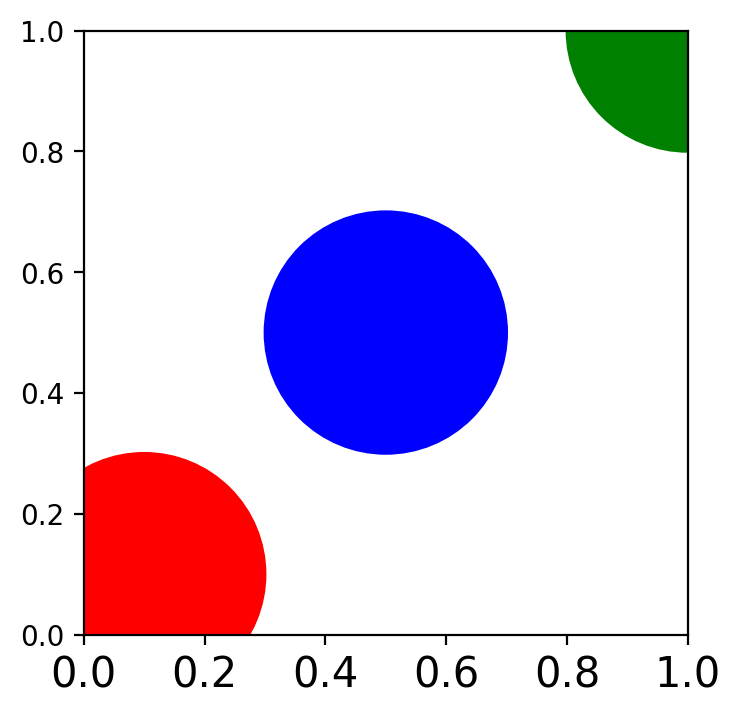

In [4]:
import math
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl


# przygotowanie rysunku
plt.figure( figsize = (4,4), dpi=200 )

plt.xticks(fontsize = 15)

ax = plt.gca()
ax.set_aspect('equal', adjustable='box' )
# konstruujemy kółka
circle1 = plt.Circle((0.1, 0.1), 0.2, color='r')
circle2 = plt.Circle((0.5, 0.5), 0.2, color='b')
circle3 = plt.Circle((1, 1), 0.2, color='g')
## rysowanie kółek
ax.add_artist(circle1)
ax.add_artist(circle2)
ax.add_artist(circle3)





[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[[ 0  2]
 [ 7 10]
 [ 9 14]]
[[-400. -400.    0.]
 [   0.    0.  400.]] [[-400. -400. -400.]
 [   0.    0.    0.]]
[[0.95140332 0.66517642 0.47645208]
 [0.16035699 0.89650667 0.2373098 ]]
[[0.86622401 0.61369815 0.54626687]
 [0.15422982 0.82835486 0.18918133]]


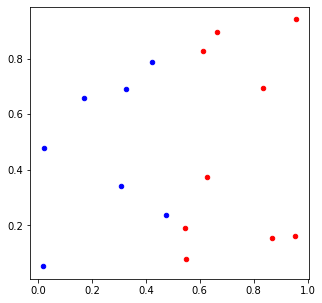

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from itertools import combinations

n_particles = 16

#IDs of the particles
#numpy.ndarray
ids = np.arange(n_particles) 
print(ids)
#each particle has a random x and y position (in range 1)
r = np.random.random((2,n_particles))

'''initial positions'''
# Color particles the start on each side
ixr = r[0]>0.5 #right ; r[0] --> referes to the x position
ixl = r[0]<=0.5 #left

#print(ixr, ixl) #boolean

'''plotting disks at initial positions'''
plt.figure(figsize=(5,5))
plt.scatter(r[0][ixr],r[1][ixr], color='r', s=20)
plt.scatter(r[0][ixl],r[1][ixl], color='b', s=20)

'''initial velocities'''
# v[0] refferes to the x velocity, v[1] referes to the y velocity
# one towards another

v = np.zeros((2, n_particles)) 
v[0][ixr] = -400
v[1][ixl] = 400

'''DISTANCE BETWEEN ALL PAIRS'''
'''determining when the particles collide and ehat their final vel going to be'''

#we need to keep track all distances between our spheres
#If the distance is less than 2 times the radius of each particle, they collide
#If there are n particles, there are n*(n-1)/2 pairs (combinatorics)

ids_pairs = np.asarray(list(combinations(ids,2)))

#x and y positions of the pairs
x_pairs = np.asarray(list(combinations(r[0], 2)))
y_pairs = np.asarray(list(combinations(r[1], 2)))

#calculating defference between positions of each disk
dx_pairs = np.diff(x_pairs, axis=1).ravel() #axis = 1 --> each row ; ravel() -->A 1-D array, containing the elements of the input
dy_pairs = np.diff(y_pairs, axis=1).ravel()

#total distance between disk i and j
d_pairs = np.sqrt(dx_pairs**2 + dy_pairs**2)

'''VELOCITIES OF THE SIMULATION'''  
radius = 0.05
#a collision occures when distances between particles is less than 2r
#finding pairs where the collision occures
ids_pairs_collide = ids_pairs[d_pairs<2*radius]
print(ids_pairs_collide)
'''
ids_pair_collide[:, 0] # --> all the elements in the first collumn 
v[:,ids_pairs_collide[:,0]] --> velocities of all the elements in the first column;
indexing values for the colliding discs 
'''

v1 = v[:, ids_pairs_collide[:,0]] #x
v2 = v[:, ids_pairs_collide[:, 1]] #y
print(v1, v2)


r1 = r[:,ids_pairs_collide[:,0]] 
r2 = r[:,ids_pairs_collide[:,1]]
print(r1)
print(r2)


Nowa wersja kodu

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from itertools import combinations
import math 

n_particles = 16
radius = 4
#each particle has a random x and y position (in range 1)
'''pętla?'''
r = np.random.random((2,n_particles))
#x, y = r[0,l], r[1,l]
'''initial positions'''
# Color particles the start on each side
ixr = r[0]>0.5 #right ; r[0] --> referes to the x position
ixl = r[0]<=0.5 #left

v = np.zeros((2, n_particles)) 
v[0][ixr]= -400
v[0][ixl]= 400

print(v)
print(ixr)

def cal_delta(k, l):
    
    xk, yk = r[0,k], r[1,k]
    xl, yl = r[0,l], r[1,l]
    
    del_x = np.array((xk - xl, yk - yl))
    
    vxl, vyl, vxk, vyk = get_v(k, l)
    
    del_v = np.array((vxk - vxl, vyk - vyl) )#as a vector
    
    return del_x, del_v



def get_v(k, l):
    
    vxk, vyk = v[0,k], v[1,k]
    vxl, vyl = v[0,l], v[1,l]   
    
    return vxl, vyl, vxk, vyk

#Algorithm 2.3 pair-collision
def pair_collision(r, v, k, l):
    
    del_x, del_v = cal_delta(k, l), 
    vxl, vyl, vxk, vyk = get_v(k, l)
    e_per = del_x/(np.norm(del_x))
    
    vxl_new, vyl_new = vxl + e_per *np.dot(del_v,e_per), vyl + e_per *np.dot(del_v,e_per)
    vxk_new, vyk_new = vxk - e_per *np.dot(del_v,e_per), vyk - e_per *np.dot(del_v,e_per)
    
    return vxl_new, vyl_new , vxk_new, vyk_new



def pair_time(k, l, current_t): #czy sie zderzy  ; del dla wszystkich ; tylko dla 2
    del_x, del_v = cal_delta(k, l)
    
    gamma = (np.dot(del_x, del_v))**2 - (np.norm(del_x))**2*((np.norm(del_x))**2 - 4*radius**2)
    
    if gamma > 0 and np.dot(del_x, del_v) <0: 
        t_pair = current_t - [np.dot(del_x, del_v) + math.sqrt(gamma)]/del_v**2
        
    else:
        t_pair = 100000000
        
    return t_pair

def get_shortest_time(current_t): #getting the shortest time in order to find the colliding disks
    
    all_partickles = combinations(list(range(n_particles)), 2)
    t_k_l_min = 100000000
    for k,l in all_partickles:
        #print(l,k)
        t_k_l = pair_time(k, l, current_t)
        print(t_k_l)
        if t_k_l < t_k_l_min:
            t_k_l_min = t_k_l
            k_min = k
            l_min = l
    print(k_min, l_min, t_k_l_min)
    return k_min,l_min,t_k_l_min

get_shortest_time(1)


[[-400.  400. -400. -400. -400.  400. -400.  400. -400. -400.  400. -400.
  -400.  400.  400.  400.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.]]
[ True False  True  True  True False  True False  True  True False  True
  True False False False]


AttributeError: ignored